In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

In [2]:
figsize = (8, 4)
title_fontsize = 20
tick_label_fontsize = 14
legend_fontsize = 14
axis_label_fontsize = 16
text_fontsize = 18

# Circadian state on CP days

In [9]:
light_condition = "early_light"
simulation_data_path = "data/chang14_selected_light_sensitivity_parameters"
selected_parameters = pd.read_csv('data/light_sensitivity_parameter_exploration/early_light_selected_light_sensitivity_parameters.csv')

## Sanity check that we're picking the right days

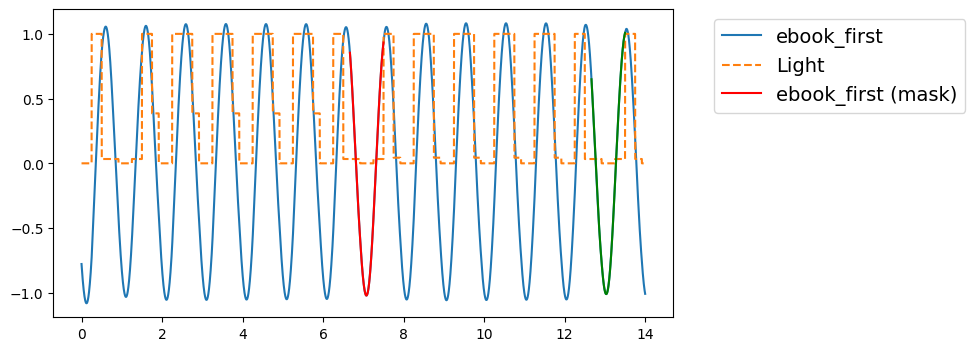

In [56]:
first_week_mask_start = 6.0 + 16.0 / 24.0 # 16 hrs on day 6
first_week_mask_end = 7.0 + 12.0 / 24.0 # 12 hrs on day 7
second_week_mask_start = 12.0 + 16.0 / 24.0 # 16 hrs on day 12
second_week_mask_end = 13.0 + 12.0 / 24.0 # 12 hrs on day 13

for idx in selected_parameters.index:
    for ebook_order in ['ebook_first', 'ebook_second']:
        for baseline_condition in ['', 'high_']:
            data = np.load(f"{simulation_data_path}/{light_condition}/{light_condition}_chang14_simulation_{idx}.npz", 
                            allow_pickle=True)
            # Ebook first
            time = data['time'] / 24.0
            trajectory_states = data[f'chang14_{baseline_condition}{ebook_order}_trajectory_states']
            light = data[f'chang14_{baseline_condition}{ebook_order}_light']

            circadian_state = trajectory_states[:, 0]

            # time mask
            first_week_mask = (time >= first_week_mask_start) & (time <= first_week_mask_end)
            second_week_mask = (time >= second_week_mask_start) & (time <= second_week_mask_end)

            plt.figure(figsize=figsize)
            plt.plot(time, circadian_state, label=f"{baseline_condition}{ebook_order}")
            plt.plot(time, light/np.max(light), label="Light", linestyle='--')
            plt.plot(time[first_week_mask], circadian_state[first_week_mask], 'r', 
                     label=f"{baseline_condition}{ebook_order} (mask)")
            plt.plot(time[second_week_mask], circadian_state[second_week_mask], 'g')


            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=legend_fontsize)
            plt.show()
            break
        break
    break



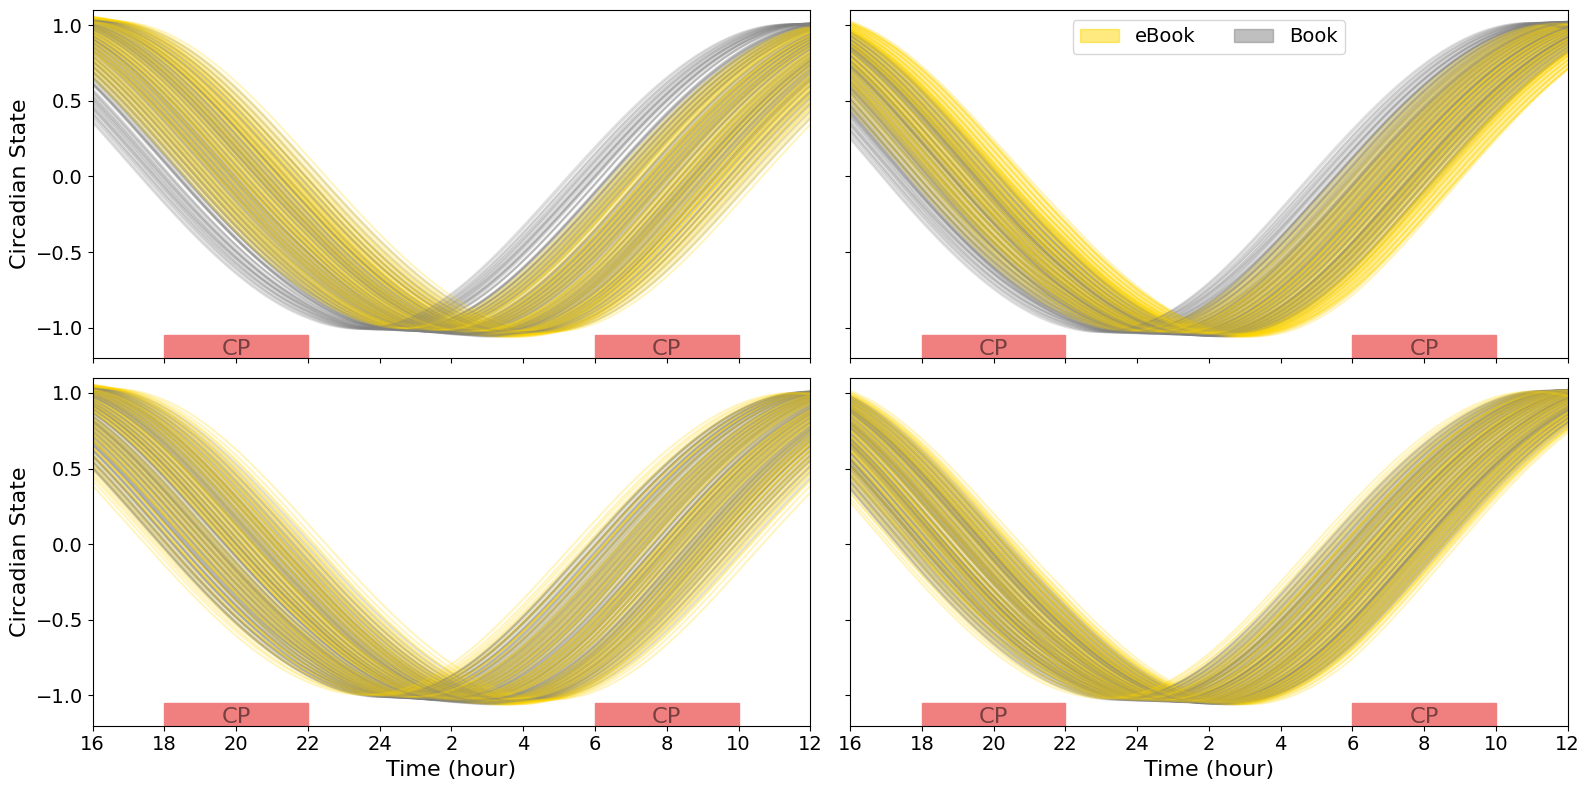

In [81]:
first_week_mask_start = 6.0 + 16.0 / 24.0 # 16 hrs on day 6
first_week_mask_end = 7.0 + 12.0 / 24.0 # 12 hrs on day 7
second_week_mask_start = 12.0 + 16.0 / 24.0 # 16 hrs on day 12
second_week_mask_end = 13.0 + 12.0 / 24.0 # 12 hrs on day 13

fig, axs = plt.subplots(2, 2, figsize=(figsize[0] * 2, figsize[1] * 2), sharex=True, sharey=True)

# top left is ebook_first without high light
# top right is ebook_first with high light
# bottom left is ebook_second without high light
# bottom right is ebook_second with high light

for kdx in range(len(selected_parameters.index)):
    sim_idx = selected_parameters.index[kdx]
    for idx, ebook_order in enumerate(['ebook_first', 'ebook_second']):
        for jdx, baseline_condition in enumerate(['', 'high_']):
            data = np.load(f"{simulation_data_path}/{light_condition}/{light_condition}_chang14_simulation_{sim_idx}.npz", 
                            allow_pickle=True)
            # Ebook first
            time = data['time'] / 24.0
            trajectory_states = data[f'chang14_{baseline_condition}{ebook_order}_trajectory_states']
            light = data[f'chang14_{baseline_condition}{ebook_order}_light']

            circadian_state = trajectory_states[:, 0]

            # time mask
            first_week_mask = (time >= first_week_mask_start) & (time <= first_week_mask_end)
            second_week_mask = (time >= second_week_mask_start) & (time <= second_week_mask_end)

            if ebook_order == 'ebook_first':
                first_condition = 'eBook'
                second_condition = 'Book'
                color_values = ['gold', 'gray']
            else:
                first_condition = 'Book'
                second_condition = 'eBook'
                color_values = ['gray', 'gold']

            axs[idx, jdx].plot((time[first_week_mask] - first_week_mask_end + 1) * 24, 
                              circadian_state[first_week_mask],
                              color=color_values[0], alpha=0.25,
                              label=first_condition)

            axs[idx, jdx].plot((time[second_week_mask] - second_week_mask_end + 1) * 24,
                              circadian_state[second_week_mask],
                              color=color_values[1], alpha=0.25,
                              label=second_condition)

axs[0, 0].set_ylabel("Circadian State", fontsize=axis_label_fontsize)
axs[1, 0].set_ylabel("Circadian State", fontsize=axis_label_fontsize)
axs[1, 0].set_xlabel("Time (hour)", fontsize=axis_label_fontsize)
axs[1, 1].set_xlabel("Time (hour)", fontsize=axis_label_fontsize)

# Constant procedures as rectangles
for idx in range(2):
    for jdx in range(2):
        rect_width = 4
        rect_height = 0.15
        rect1 = patches.Rectangle((6, -1.2), rect_width, rect_height, linewidth=1, edgecolor='lightcoral', facecolor='lightcoral')
        rect2 = patches.Rectangle((18, -1.2), rect_width, rect_height, linewidth=1, edgecolor='lightcoral', facecolor='lightcoral')
        axs[idx, jdx].add_patch(rect1)
        axs[idx, jdx].add_patch(rect2)
        text_location1 = (6 + rect_width / 2, -1.215 + rect_height / 2)
        text_location2 = (18 + rect_width / 2, -1.215 + rect_height / 2)
        axs[idx, jdx].text(*text_location1, 'CP', fontsize=text_fontsize * 0.9, ha='center', va='center', alpha=0.5)
        axs[idx, jdx].text(*text_location2, 'CP', fontsize=text_fontsize * 0.9, ha='center', va='center', alpha=0.5)

# Create legend with patches
legend_elements = [patches.Patch(facecolor='gold', edgecolor='gold', label='eBook', alpha=0.5),
                   patches.Patch(facecolor='gray', edgecolor='gray', label='Book', alpha=0.5)]
axs[0, 1].legend(handles=legend_elements, loc='best', fontsize=legend_fontsize, ncols=2)


axs[0, 0].set_xticks(np.linspace(4, 24, 11))
axs[0, 0].set_xticklabels([
    '16', '18', '20', '22', '24', '2', '4', '6', '8', '10', '12'
], fontsize=tick_label_fontsize)
axs[0, 0].set_xlim([4, 24])
axs[0, 0].set_ylim([-1.2, 1.1])

axs[0, 0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)
axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

plt.savefig(f"figures/circadian_states_{light_condition}.pdf", bbox_inches='tight')
plt.savefig(f"figures/circadian_states_{light_condition}.png", bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()

# Phase shift

In [3]:
simulation_features = pd.read_csv("data/chang14_selected_light_sensitivity_parameters/selected_light_sensitivity_parameters_simulation_features.csv", index_col=0)